# Exploration analysis of dataset

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data1 = pd.read_csv('Data/train/513181.csv', sep=',')
data2 = pd.read_csv('Data/train/10035828.csv', sep=',')
target = pd.read_csv('Data/train.csv', sep=',')

## Basic visualisations

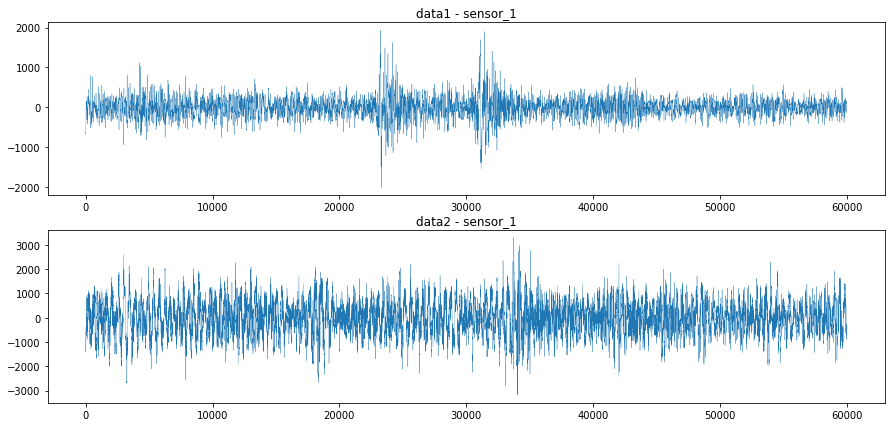

In [3]:
plt.figure(figsize=(15,7))

plt.subplot(211)
plt.plot(data1['sensor_1'], linewidth=0.3)
plt.title('data1 - sensor_1')

plt.subplot(212)
plt.plot(data2['sensor_1'], linewidth=0.3)
plt.title('data2 - sensor_1')
plt.show()

## Fourier Transform

In [4]:
len(data1)

60001

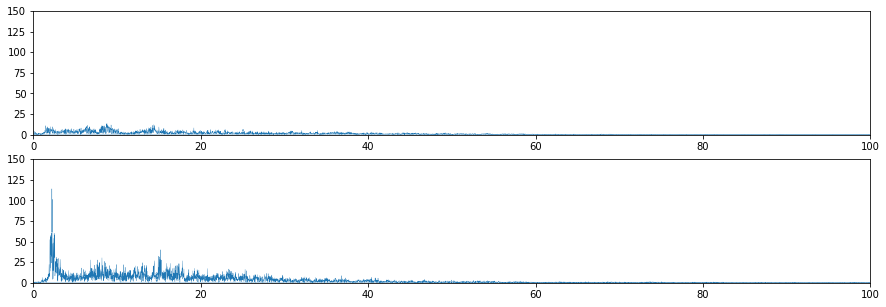

In [5]:
N = len(data1)
Te = 10**-3

sp1 = np.fft.fft(data1['sensor_3'])
sp2 = np.fft.fft(data2['sensor_1'])
freq = np.fft.fftfreq(data1['sensor_1'].shape[0])

plt.figure(figsize=(15,5))
plt.subplot(211)
plt.plot(freq/10**-3, abs(sp1)/N, linewidth=0.3)
plt.xlim([0,100])
plt.ylim([0,150])

plt.subplot(212)
plt.plot(freq/10**-3, abs(sp2)/N, linewidth=0.3)
plt.xlim([0,100])
plt.ylim([0,150])
plt.show()

In [6]:
data_fft = data1.apply(np.fft.fft)
data_fft = abs(data_fft)/len(data1)

In [7]:
data_fft['freq'] = freq/10**-3

In [8]:
data_fft = data_fft[data_fft['freq']>=0]
data_fft = data_fft[data_fft['freq']<60]
data_fft

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,freq
0,1.363644,0.069682,4.534174,1.172580,0.260329,1.156781,0.199297,1.383094,0.564724,1.542924,0.000000
1,0.161253,0.055472,1.061992,3.387593,0.112842,0.903895,1.034883,0.727398,0.010232,18.392085,0.016666
2,0.148947,0.044712,0.966427,1.636110,0.183799,0.868952,0.312519,0.867414,0.147644,42.300439,0.033333
3,0.233627,0.148290,0.900640,1.585437,0.160240,0.751922,0.771164,0.070022,0.075612,14.692492,0.049999
4,0.102042,0.256387,0.589771,0.794378,0.064625,1.256760,0.314269,0.338927,0.036436,29.092097,0.066666
...,...,...,...,...,...,...,...,...,...,...,...
3596,0.088316,1.199709,0.410383,0.787045,1.216381,1.025901,0.183530,2.240621,0.521461,1.338614,59.932334
3597,0.057334,2.852810,0.328096,0.732779,0.790602,0.657729,0.111132,0.569021,0.550237,1.495526,59.949001
3598,0.415234,5.050734,0.194540,0.583286,1.915661,0.397329,0.018765,1.162351,0.915631,1.601401,59.965667
3599,0.035422,3.230623,0.322209,0.257145,1.000513,0.554157,0.116146,2.536810,0.256615,1.125163,59.982334


In [9]:
data_fft.set_index('freq', inplace=True)

In [10]:
data_fft['mean_fft'] = data_fft.mean(axis=1)
data_fft['max_fft'] = data_fft.max(axis=1)
data_fft['min_fft'] = data_fft.min(axis=1)

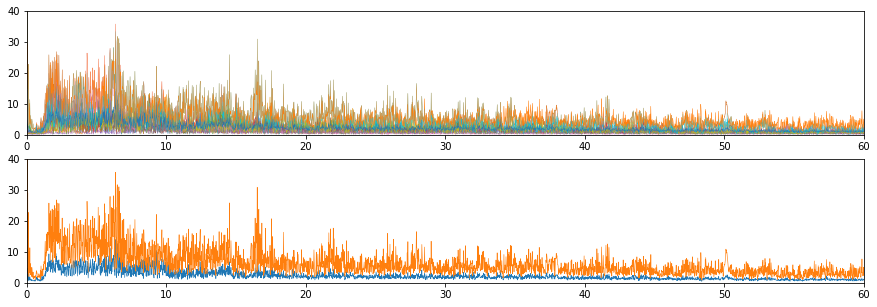

In [11]:
plt.figure(figsize=(15,5))

plt.subplot(211)
for column in data_fft.columns[:-1]:
    plt.plot(data_fft.index, data_fft[column], linewidth=0.3)
    plt.xlim([0,60])
    plt.ylim([0,40])

plt.subplot(212)
plt.plot(data_fft.index, data_fft['mean_fft'], linewidth=0.6)
plt.plot(data_fft.index, data_fft['max_fft'], linewidth=0.6)
plt.xlim([0,60])
plt.ylim([0,40])
plt.show()

In [12]:
data_fft['sensor_1'].nlargest(5)

freq
8.383194     17.195589
13.949768    16.243925
8.399860     15.663246
14.133098    15.485443
8.366527     15.285817
Name: sensor_1, dtype: float64

In [13]:
data_fft['sensor_1'].nlargest(5).reset_index().values.flatten().tolist()

[8.383193613439776,
 17.195588623824023,
 13.949767503874934,
 16.243924878083718,
 8.399860002333295,
 15.663245600734175,
 14.133097781703638,
 15.48544309667119,
 8.366527224546257,
 15.285816763169068]

In [14]:
data_res = data_fft.mean()[-3:]

In [15]:
features = data_fft.sort_values('max_fft', ascending=False).iloc[:5,-3:]

In [16]:
features

,mean_fft,max_fft,min_fft
freq,,,
0.033333,4.747696,42.300439,0.044712
6.349894,14.001599,35.789714,1.216653
6.483225,12.707563,31.757054,0.879107
6.599890,9.984044,31.078208,1.570770
16.516391,7.681590,30.932972,0.649633


In [17]:
features_names = []

for i in range(1,6):
    features_names.append('freq_'+str(i))
    features_names.append('mean_fft_'+str(i))
    features_names.append('max_fft_'+str(i))
    features_names.append('min_fft_'+str(i))

for index in data_res.index:
    features_names.append(index)

In [18]:
features_values = []
features_values = features.reset_index().values.flatten().tolist()

for elt in data_res.values:
    features_values.append(elt)

In [19]:
pd.DataFrame([features_values], columns=features_names)

,freq_1,mean_fft_1,max_fft_1,min_fft_1,freq_2,mean_fft_2,max_fft_2,min_fft_2,freq_3,mean_fft_3,...,mean_fft_4,max_fft_4,min_fft_4,freq_5,mean_fft_5,max_fft_5,min_fft_5,mean_fft,max_fft,min_fft
0,0.033333,4.747696,42.300439,0.044712,6.349894,14.001599,35.789714,1.216653,6.483225,12.707563,...,9.984044,31.078208,1.57077,16.516391,7.68159,30.932972,0.649633,2.296782,6.320246,0.377063


# Visualisation de toutes les données

In [20]:
import os 

def import_and_transform_data(path, limit=100):
    filenames = os.listdir(path)[:limit] # get list of filenames in path
    df = pd.DataFrame()

    for filename in filenames:
        raw_data = pd.read_csv(path+filename, sep=',') # import data

        # Fourier transform
        N = len(raw_data)
        data = raw_data.apply(np.fft.fft)
        data = abs(data)/N
        freq = np.fft.fftfreq(N)/10**-3
        data['freq'] = freq
        data = data[(data['freq']>=0) & (data['freq']<40)]
        data.fillna(0, inplace=True)

        # Extract features
        data.set_index('freq', inplace=True)
        segment_id = filename.split('.')[0] # get segment_id of the data

        for column in data.columns:
            features = data[column].nlargest(5)
            features_values = features.reset_index().values.flatten().tolist()
            features_values.append(np.mean(data[column]))
            
            features_values.append(int(segment_id))
            features_values.append(column)

            # append features to dataframe
            df = pd.concat([df, pd.DataFrame([features_values])], axis=0, ignore_index=True)

        # Add ids
        
        # df['segment_id'] = int(segment_id) # adding segment_id
        # df['observation'] = data.columns
    
    df.columns = ['freq_1', 'max_fft_1', 'freq_2', 'max_fft_2', 'freq_3', 'max_fft_3', 'freq_4', 'max_fft_4', 'freq_5', 'max_fft_5',
                 'mean_fft', 'segment_id', 'observation']
                  
    return df

In [21]:
df = import_and_transform_data('Data/train/', limit=None)

In [22]:
df = df.merge(target, on='segment_id')

In [23]:
df

,freq_1,max_fft_1,freq_2,max_fft_2,freq_3,max_fft_3,freq_4,max_fft_4,freq_5,max_fft_5,mean_fft,segment_id,observation,time_to_eruption
0,1.883302,9.639338,2.366627,8.458991,1.666639,8.257391,1.966634,8.127246,2.299962,7.758564,1.189664,1000015382,sensor_1,16258654
1,0.000000,0.000000,0.016666,0.000000,0.033333,0.000000,0.049999,0.000000,0.066666,0.000000,0.000000,1000015382,sensor_2,16258654
2,0.133331,10.692555,0.216663,10.467411,1.866636,10.255994,0.116665,9.704382,0.233329,9.010784,1.672792,1000015382,sensor_3,16258654
3,2.266629,7.551824,2.083299,6.575003,1.799970,6.403407,1.716638,6.326825,2.133298,6.243656,1.473642,1000015382,sensor_4,16258654
4,25.449576,3.448453,26.016233,3.331552,26.066232,2.554007,32.366127,2.434790,20.499658,2.428688,0.663913,1000015382,sensor_5,16258654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44305,3.016616,43.187019,2.799953,41.119295,2.849953,39.462593,2.749954,38.563558,2.666622,36.103293,3.224779,999761287,sensor_6,7511308
44306,4.033266,44.428419,2.816620,38.705036,4.233263,38.554772,4.166597,37.754839,4.066599,36.263910,4.143865,999761287,sensor_7,7511308
44307,2.516625,27.932748,2.649956,24.640859,3.083282,22.097149,3.316611,21.926376,4.666589,21.892223,3.451613,999761287,sensor_8,7511308
44308,0.000000,0.000000,0.016666,0.000000,0.033333,0.000000,0.049999,0.000000,0.066666,0.000000,0.000000,999761287,sensor_9,7511308


In [24]:
df = df[df.iloc[:,0:-3].sum(axis=1) > 1]

In [25]:
df

,freq_1,max_fft_1,freq_2,max_fft_2,freq_3,max_fft_3,freq_4,max_fft_4,freq_5,max_fft_5,mean_fft,segment_id,observation,time_to_eruption
0,1.883302,9.639338,2.366627,8.458991,1.666639,8.257391,1.966634,8.127246,2.299962,7.758564,1.189664,1000015382,sensor_1,16258654
2,0.133331,10.692555,0.216663,10.467411,1.866636,10.255994,0.116665,9.704382,0.233329,9.010784,1.672792,1000015382,sensor_3,16258654
3,2.266629,7.551824,2.083299,6.575003,1.799970,6.403407,1.716638,6.326825,2.133298,6.243656,1.473642,1000015382,sensor_4,16258654
4,25.449576,3.448453,26.016233,3.331552,26.066232,2.554007,32.366127,2.434790,20.499658,2.428688,0.663913,1000015382,sensor_5,16258654
5,2.033299,21.418173,2.133298,21.168507,2.366627,18.899839,2.149964,17.874449,1.933301,17.645651,1.833520,1000015382,sensor_6,16258654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44303,21.199647,38.558895,15.033083,35.688709,15.433076,35.111841,19.466342,33.423223,16.199730,32.371029,7.095065,999761287,sensor_4,7511308
44305,3.016616,43.187019,2.799953,41.119295,2.849953,39.462593,2.749954,38.563558,2.666622,36.103293,3.224779,999761287,sensor_6,7511308
44306,4.033266,44.428419,2.816620,38.705036,4.233263,38.554772,4.166597,37.754839,4.066599,36.263910,4.143865,999761287,sensor_7,7511308
44307,2.516625,27.932748,2.649956,24.640859,3.083282,22.097149,3.316611,21.926376,4.666589,21.892223,3.451613,999761287,sensor_8,7511308


In [26]:
from lazypredict.Supervised import LazyRegressor

X = df.iloc[:,:-3].values.astype(np.float32)
y = df['time_to_eruption']

offset = int(X.shape[0] * 0.7)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

lazyreg = LazyRegressor(verbose = 0, ignore_warnings=True, custom_metric=None)
models, predictions = lazyreg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 43/43 [14:07<00:00, 19.71s/it]


In [28]:
models

,R-Squared,RMSE,Time Taken
Model,,,
RandomForestRegressor,0.32,11205305.96,35.59
ExtraTreesRegressor,0.32,11209027.21,14.17
HistGradientBoostingRegressor,0.27,11582846.24,1.93
LGBMRegressor,0.27,11585700.39,0.43
XGBRegressor,0.27,11607238.37,3.38
BaggingRegressor,0.25,11725794.04,5.02
GradientBoostingRegressor,0.20,12134582.77,8.81
AdaBoostRegressor,0.12,12720176.66,1.40
KNeighborsRegressor,0.12,12753470.76,1.07
